Enter variable: State
Enter comparison >,<,= : =
Enter value of cutoff: MN
Do you want to slice by another variable (Y for yes?) n


      Cust_ID  Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score First_home  \
31       1031      47   88000.0                 100           694          N   
43       1043      37  111750.0                 100           683          N   
78       1078      29  159000.0                 100           684          N   
298      1298      47  144880.0                 100           664          Y   
362      1362      30  200000.0                  92           696          Y   
443      1443      37  110450.0                  90           676          Y   
590      1590      29  278000.0                 100           728          Y   
872      1872      52  152100.0                  90           666          Y   
1007     2007      39  141550.0                  90           714          N   
1087     2087      37  139650.0                  95           736          N   

      Tot_mthly_debt_exp  Tot_mthly_incm  orig_apprd_val_amt  pur_prc_amt  \
31                  1370            5500  

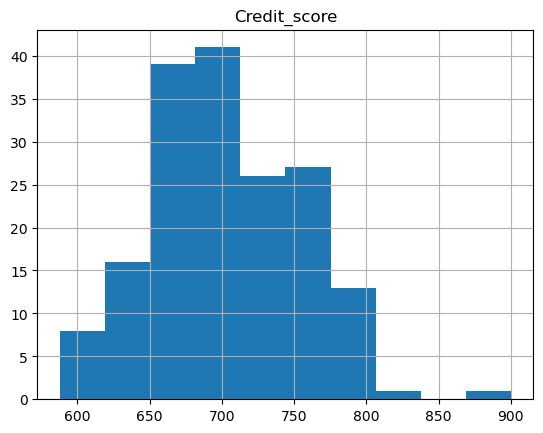


Saved marketing list to marketing_list.csv (172 rows).


In [16]:
#Final Lab Question 1

# import pandas for file read and matplotlib.pyplot for histogram
import pandas as pd
import matplotlib.pyplot as plt

# Load data 
df = pd.read_csv("loan default.csv")

# Collect and apply user filters (can add many)
filtered = df.copy()
comparisons = {">", "<", "="}                   ## potential user inputted comparisons set

keep_going = "Y"                                ## string variable used to cotnrol whether while loop continues

# Condition-controlled loop
while keep_going.upper() == "Y":                                            ## lopp continues as long as user inputs "Y" (case-insensitive)
    col = input("Enter variable:").strip()                                  ## string entered by user specifying which column to filter
    if col not in filtered.columns:                                         ## checks if the column is avaiable in the data set
        print("Column not found. Available:", ", ".join(filtered.columns))  ## prints if column not found
        continue                                                            ## restarts loop if user inputs invalid column name (found "continue" operator using AI) 

    op = input("Enter comparison >,<,= :").strip()                          ## "op" string entered by using indicating the comparison operator used
    if op not in comparisons:                                               ## checks if operator is within "comparisons" set
        print("Invalid operator.")                                          ## prints if invalid operator
        continue                                                            ## restarts loop

    raw = input("Enter value of cutoff:").strip()                           ## string representing the threshold value for filtering

    try:
        cutoff = float(raw)                                                 ## "cutoff" becomes a float if raw input is convertible
    except ValueError:
        cutoff = raw                                                        ## "cutoff" stays a string for categorical and text comparisons
        
    # Apply rule
    s = filtered[col]                                                       ## "s"  series represents one column of the DataFrame
    if   op == ">":  filtered = filtered[s >  cutoff]
    elif op == "<":  filtered = filtered[s <  cutoff]
    elif op == "=":  filtered = filtered[s == cutoff]
    ## depending on the operator inputted, filters rows in new "filtered" set and keeps only values that match condition
    
    if len(filtered) == 0:                                                  ## if no rows are left after user inputtted filtering, this stops the process
        print("No rows match. Stopping.")
        break

    keep_going = input("Do you want to slice by another variable (Y for yes?)").strip() or "N"  
    ## updates "keep_going" with new user variable input (if anything other than "Y" --> defaults to "N")


# Show 10-row head of the new DataFrame
print(filtered.head(10))  

# Histogram of credit score for the filtered set 
if "Credit_score" in filtered.columns and pd.api.types.is_numeric_dtype(filtered["Credit_score"]):  ## checks that "credit_score" exists and is numeric (found "api.types.is_numeric_dtype" via AI)
    filtered["Credit_score"].dropna().plot(kind="hist", bins=10)                                    ## creates a histogram with 10 bins (as example shows), igorning any null values
    plt.title("Credit_score")       ## plot title
    plt.grid(True)                  ## adds gridlines to histogram (like the example)
    plt.ylabel("")                  ## removes any label (like "Frequency") on y-axis
    plt.xlabel("")                  ## no x-axis label
    plt.show()                      ## displays plot

# Saving marketing list 
filtered.to_csv("marketing_list.csv", index=False)                           ## exports the new filtered DataFrame to a new CSV file called "marketing_list.csv", without row index

print(f"\nSaved marketing list to marketing_list.csv ({len(filtered)} rows).")                       ## confirmation message with the number of rows saved


Enter the beginning date between 2017-01-03 and 2017-12-29:  2016-01-02


Start date is out of the date range



Enter the beginning date between 2017-01-03 and 2017-12-29:  2017-01-03

Enter the ending date between 2017-01-03 and 2017-12-29:  2017-12-30


End date is out of date range



Enter the ending date between 2017-01-03 and 2017-12-29:  2017-12-29





Summary of stock prices from 2017-01-03 to 2017-12-29

        Beginning Price  Close Price  Minimum  Maximum  Average
Symbol                                                         
BA               156.97       294.91   156.97   297.90   215.25
NVDA               2.55         4.84     2.39     5.42     3.74
TSLA              14.47        20.76    14.47    25.67    20.95


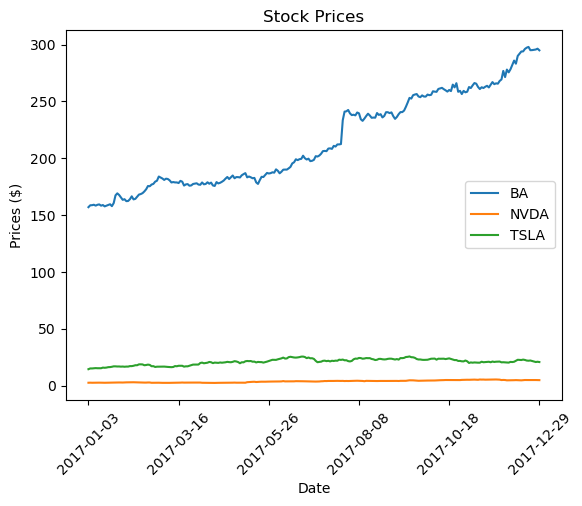

In [17]:
#Final Lab Problem 2
#First we need to install the packages that we will use in the following code. 
import pandas as pd
import matplotlib.pyplot as plt
#Next we call each of the csv files that we exported to csv using the google finance sheets. We can do that by making a seperate datafram with pandas for each of the stocks. 
BA=pd.read_csv("BA.csv")
NVDA=pd.read_csv("NVDA.csv")
TSLA=pd.read_csv("TSLA.csv")
#Next we need to split the dates from the times associated with them. Otherwise the user input for dates wont translate to lookup.
#We use a count loop here with our three inputs to consolidate the code instead of writing each out manually. 
for df in (BA, NVDA, TSLA):
    #We are stripping and splitting on the space in the date input characters from each string because of the format xxxx-xx-xx for dates.
    df["Date"] = df["Date"].str.split().str[0]  
    #Here we use the panda feature "to_datetime" in order to make python read the dates correctly with its max/min function
    #Had to look up the .to_datetime on the pandas website, date time put the timestamp back so we need to format for the user input to only be in the format we want.
    #We had to look up the .dt.strftime in order to keep it in string format for the if statements to translate below.
    df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d")
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

#After that we need to create a dictionary for each of the seperate stocks we want to use for this analysis program in order to name the seperate stocks.
stocks = {"BA": BA, "NVDA": NVDA, "TSLA": TSLA}

#From there we can call and concatinate the dates together into one list called "all_dates"
all_dates = pd.concat([stocks["BA"]["Date"],stocks["NVDA"]["Date"],stocks["TSLA"]["Date"]])
#Next we find the minimum and maximum values for the dates provided. 
#This could be hard coded for this program but for it to work for different data files we instead look up the date values.
min_date = all_dates.min()
max_date = all_dates.max()


#First we ask for the user input for the date range they are analyzing.
#We assign the user input to the variable 'start'  formatted float so the dates come back as values to match formatting
start = input(f"Enter the beginning date between {min_date} and {max_date}: ")
#Next we set up a conditional loop for the user input. This insurures that the user input is going to be within our suplpied date range.
#If the input does not meet the date range then the loop continues with the output below.
while (start < min_date) or (start > max_date):
    print("Start date is out of the date range")
    #once we get through the logic, we rewrite the variable start with the allowed input from the user
    start = input(f"\nEnter the beginning date between {min_date} and {max_date}: ")

#Since there are multiple possibilties for expected inputs from the user for this requires a nested while statement, this insurues that all conditions are being met with each input requested from the user.
#After the conditional loop is met above, we then can ask the user to input the end date. Formatted float so the dates come back as values to match formatting
end = input(f"\nEnter the ending date between {min_date} and {max_date}: ")
#Here we set up the while statement for a catch all conditions. We then set up the nested if statement within in order to set up the two seperate output possibiltieis from the user input.
#The while lets it loop until the condition is met. 
while (end < start) or (end < min_date) or (end > max_date): 
    if end < start:    
        print("End date cannot be before start date")
    else:
        print("End date is out of date range")
    #once we get through the logic, we rewrite the variable end with the allowed input from the user
    end = input(f"\nEnter the ending date between {min_date} and {max_date}: ")

#Print the user inputted date range as the summary range in the output
print(f"\n\n\nSummary of stock prices from {start} to {end}\n")

#First we need to set all the variables we are going to use in the output to be blank
names = []
startclose = []
endclose = []
minclose = []
maxclose = []
avgclose = []
#Next we have to loop in each of our stocks to be able to do the math on the data we supplied
#its going to be a very long for loop because we have a lot of steps for each stock.
for symbol in ["BA", "NVDA", "TSLA"]:
    sub = stocks[symbol]
    #Here we sort the date values in order so we can grab the first and last values easily
    sub = sub[(sub["Date"] >= start) & (sub["Date"] <= end)].sort_values("Date")
    #Here we just insure close values are changed to numeric so we can do our calculations below for the data table
    #We then set the data to the varaible "close"
    close = sub["Close"]
    #Double check audit function here to make sure there is no divide by 0 going on
    if len(close) == 0:
        start_c = 0.0
        end_c = 0.0
        mx = 0.0
        mn = 0.0
        avg = 0.0
    #So assuming out data wont have 0's we come here
    else:
        #First we get our start and end dates by looking at the first and last data points in the provided data sets.
        #To call the start and end dates, we use the head and tail function to print them to the list below
        start_c = round(float(close.head(1).values[0]), 2)
        end_c   = round(float(close.tail(1).values[0]), 2)
        #We then start doing the data sorting and math to get our data for the summary
        mx = round(close.max(),2)
        mn = round(close.min(),2)
        #Next were going to calcuate the average manually 
        #We can use built in functions of count and sum in order to get the two variables we need to get thea average over the date span
        total = float(close.sum())
        count = int(close.count())
        avg = round(total / count, 2)
    #Next we use the pandas append function to save the rows of data we have currently calculated
    names.append(symbol)
    startclose.append(start_c)
    endclose.append(end_c)
    maxclose.append(mx)
    minclose.append(mn)
    avgclose.append(avg)
#Next we have to build the summary table for the output, we assign the title of each column to the associated appended list from before.
#We also set the index to reference based on the symbol rather then a count of each stock.
summary = pd.DataFrame({"Symbol": names,"Beginning Price": startclose,"Close Price": endclose,"Minimum": minclose,"Maximum": maxclose,"Average": avgclose}).set_index("Symbol")  
#Next we print our statistics
print(summary)

#Next we are going to use Madplotlib to create a line graph for historic prices 
#First we call figure to call in madplotlib
plt.figure()
#Next we use the same logic as before to plot out the three different stocks we have supplied data for. We run through the loop 3 times to get three different data points to plot
#We are making each plot based on the close price of each day in the supplied user input of ranges
for symbol in ["BA", "NVDA", "TSLA"]:
    df = stocks[symbol]
    sub = df[(df["Date"] >= start) & (df["Date"] <= end)]
    plt.plot(sub["Date"], sub["Close"], label=symbol)
#Next after making the three lines we have to set the dates for the X-axis markers.
#I had to ask ChatGPT how to format and the following this because It just was not making sense to me.
dates = BA[(BA["Date"] >= start) & (BA["Date"] <= end)].sort_values("Date")["Date"].tolist()
#After it put the list of dates together it gave me this complex formula to equally divide the date amounts by 6 to get equal spacings on the graph no matter the user input of dates.
if dates:
    #Here chatgpt is assigning the index 6 different dates by doing integer math
    idx = [0, len(dates)//5, 2*len(dates)//5, 3*len(dates)//5, 4*len(dates)//5, len(dates)-1]
    #After it did the integer math it assigns the new dates we came up with the 6 ticks of the X-axis 
    ticks = [dates[i] for i in idx]
    #After that we plot the xticks using the madplotlib function, and we rotate at 45* to get the axis formatted the correct way.
    plt.xticks(ticks, rotation=45)
#After that we can just call our general madplotlib functions to make the graph 
#First title the graph
plt.title("Stock Prices")
#Next label the graph axis'
plt.xlabel("Date")
plt.ylabel("Prices ($)")
#Assign it a legend and make the legend move locations to match expected output on final lab assignment. 
plt.legend(loc="center right")
#Then print
plt.show()


Enter loan amount ($):  500000
Enter annual interest rate (%):  6
Enter loan term (years):  20


Monthly payment: $3582.16


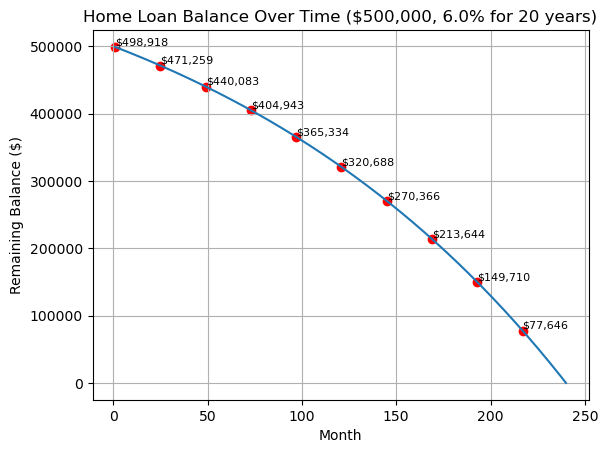

Try another loan? (y/n):  n


In [18]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

###This sets up the calculations for the dates and payments
def mortgage_schedule(loan, annual_rate, years):
    #Setup dates using QuantLib data on united states
    calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
    today = ql.Date.todaysDate()
    #Set the evaluation date equal to today
    ql.Settings.instance().evaluationDate = today
    
    #Standard Quantlib Schedule of payments setup (monthly)
    start_date = today
    #Set end date with Quantlib
    end_date = calendar.advance(start_date, ql.Period(years, ql.Years))
    schedule = ql.Schedule(start_date,end_date,ql.Period(ql.Monthly),calendar,ql.Unadjusted, ql.Unadjusted,ql.DateGeneration.Forward, False)
    
    #Construct fixed-rate loan
    day_count = ql.Actual360()
    rate = annual_rate / 100.0
    #Quantlib function to set up fixed coupon rates
    leg = ql.FixedRateLeg(schedule, day_count, [loan], [rate])

    ###This calculates the monthly payments
    monthly_rate = annual_rate / 100 / 12
    n_payments = years * 12
    #Monthly payment formula & Set variable to 0
    payment = loan * (monthly_rate * (1 + monthly_rate)**n_payments) / ((1 + monthly_rate)**n_payments - 1)
    balances = []
    balance = loan
    #This is the calculations of the break down of each of the payments
    #Calulates for all instances of n_payments or in otherwords the amount of months
    for i in range(n_payments):
        interest = balance * monthly_rate
        principal_paid = payment - interest
        #Each principle payment reduces the overall balance
        balance -= principal_paid
        balances.append(balance)
    return payment, balances

def main():
    while True:
        try:
            loan = float(input("Enter loan amount ($): "))
            ###This ensures that a positive loan is inputted by the user
            if loan < 0:
                #User input
                print('You cannot enter a negative loan amount')
                loan=float(input("Enter another loan amount ($): "))
                annual_rate = float(input("Enter annual interest rate (%): "))
                years = int(input("Enter loan term (years): "))
                ###This calls what we returned in the mortgage_schedule value-returning function
                payment, balances = mortgage_schedule(loan, annual_rate, years)
            else:
                annual_rate = float(input("Enter annual interest rate (%): "))
                years = int(input("Enter loan term (years): "))
                ###This calls what we returned in the mortgage_schedule value-returning function
                payment, balances = mortgage_schedule(loan, annual_rate, years)

                print("Monthly payment: ${:.2f}".format(payment))
            
            ###This creates the graph which shows the life of the loan
            months = np.arange(1, len(balances)+1)
            #Comparison of two variables
            plt.plot(months, balances)
            #loan title
            plt.title("Home Loan Balance Over Time (${:,.0f}, {}% for {} years)".format(loan, annual_rate, years))
            #Graph axis labels
            plt.xlabel("Month")
            plt.ylabel("Remaining Balance ($)")
            plt.grid(True)
            #Showing each remaining balance over 2 year intervals on the plot using the scatter function.
            for m in range(0, years*12, 24):
                plt.scatter(m+1, balances[m], color='red')
                #labels the points on the scatterplot with remaining balance 
                plt.text(m+1, balances[m], "${:,.0f}".format(balances[m]), fontsize=8, ha='left', va='bottom')
            plt.show()
        except Exception as e:
            print("Error:", e)
        #User input to restart the loop
        if input("Try another loan? (y/n): ").lower() != "y":
            break

main()
